## Data Scientist Technical Challenge
#### Katherine Ridley
#### The Data Lab, September 2022


In [487]:
from dataclasses import dataclass
import pandas as pd
import numpy as np
import os
import math
import scipy
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from docx import Document
from docx2pdf import convert
from docx.shared import Inches
import datetime
import time
import sys
import pandas as pd
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Spectral6
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter)

from bokeh.transform import transform

from bokeh.plotting import figure, show

from bokeh.palettes import RdYlGn6, RdYlGn9
from bokeh.sampledata.autompg import autompg
from bokeh.sampledata.unemployment1948 import data

from bokeh.sampledata.commits import data
from bokeh.transform import jitter
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import ColumnDataSource, CDSView, GroupFilter
from bokeh.core.enums import MarkerType
from bokeh.io import curdoc, show
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Scatter
from datetime import date
#interact py widgets
from ipywidgets import interact, interactive, fixed, interact_manual
#from bokeh.io import vform
from bokeh.models import CustomJS
from bokeh.models import Panel, Tabs
from bokeh.models.widgets import CheckboxButtonGroup, CheckboxGroup, Dropdown, MultiSelect, RadioGroup, Select, Slider, Tabs, TextInput
from bokeh.layouts import column
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.models import Legend

from random import random
from bokeh.layouts import column
from bokeh.models import Button
from bokeh.palettes import RdYlBu3
from bokeh.plotting import figure, curdoc


from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, MissingIndicator

from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn import tree 
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import cross_validate

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import BaggingClassifier as BGC
from sklearn import decomposition, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import joblib
from sklearn.metrics import roc_curve, auc
from sklearn import tree 
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2


#### Part 1: Data Exploration
Glasgow City Council (GCC), are interested in adopting a data-driven approach to accident
mitigation and have requested an initial review of the existing data. To answer this query, use
any suitable data processing and visualisation techniques to help GCC to inform their
understanding. In your submission, please provide your top four data visualisations, which are
annotated for the council.

In [488]:
#enter path to csv here

path= "C:/Users/KatherineRidley/Downloads/thedatalab_challenge/"
#read in csv
rsa_data = pd.read_csv(path+'Road_Safety_Accidents.csv')


In [489]:


output_file("RSAscatter.html")


rsa_data['DAY_OF_WEEK'] = pd.Categorical(rsa_data['DAY_OF_WEEK'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
rsa_data['TIME']= pd.to_datetime(rsa_data['TIME']).dt.time
rsa_data['DATE_'] = pd.to_datetime(rsa_data['DATE_']).dt.date
#HOUR

rsa_data['TIME'] = rsa_data['TIME'].astype(str)
rsa_data['DATE_'] = rsa_data['DATE_'].astype(str)
rsa_data['HOUR'] = pd.to_datetime(rsa_data['TIME']).dt.hour
rsa_data['HOUR'] = rsa_data['HOUR'].astype(int)

#DATA MONTH
rsa_data['MONTH'] = pd.to_datetime(rsa_data['DATE_']).dt.month
rsa_data['MONTH'] = rsa_data['MONTH'].astype(int)

#DATA YEAR
rsa_data['YEAR'] = pd.to_datetime(rsa_data['DATE_']).dt.year
rsa_data['YEAR'] = rsa_data['YEAR'].astype(int)


cat_list=['ACCIDENT_SEVERITY','ROAD_TYPE', 'JUNCTION_DETAIL', 'JUNCTION_CONTROL', 'PEDESTRIAN_CROSSING_HUMAN_CONT', 'PEDESTRIAN_CROSSING_PHYSICAL_F',
       'LIGHT_CONDITIONS', 'WEATHER_CONDITIONS', 'ROAD_SURFACE_CONDITIONS',
       'SPECIAL_CONDITIONS_AT_SITE', 'CARRIAGEWAY_HAZARDS',
       'URBAN_OR_RURAL_AREA']


#output_file("bars.html")

def make_plot(cat):
    

    #rsa_data['DATE_'] = rsa_data['DATE_'].dt.strftime('%Y-%m-%d')
    
    #rsa_data['YEAR'] = rsa_data['YEAR'].dt.strftime('%Y')
    
    DAYS = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
    MONTHS=['1','2','3','4','5','6','7','8','9','10','11','12']
    YEARS = rsa_data['YEAR'].astype(str).unique()
    source = ColumnDataSource(rsa_data)
    #view1 = CDSView(source=source, filters=[GroupFilter(column_name='DAY_OF_WEEK', group='Sunday')]) 
    hover = HoverTool(tooltips=[("Time", "@TIME"),("Day","@DAY_OF_WEEK"), ('{}'.format(cat), '@{}'.format(cat))])

    p = figure(width=1200, y_range=DAYS, x_range=(0, 24),  title="{} by Day of Week and Time of Day".format(cat),
            toolbar_location='above', sizing_mode="stretch_width", tools=[hover, 'wheel_zoom','save'])

    AS= list(rsa_data[cat].unique().astype(str))
    #MARKERS = ['hex', 'circle_x', 'triangle']

    #BOKEH SCATTER
    #p.circle(x=jitter('HOUR', width=1, range=p.y_range), y=jitter('DAY_OF_WEEK', width=0.6, range=p.y_range), legend_field="ACCIDENT_SEVERITY", source=source,  
    #alpha=0.7, color=factor_cmap('ACCIDENT_SEVERITY', 'Category10_7', AS))

    #BOKEH SCATTER
    markers = list(MarkerType)

    markers = markers[0:len(AS)]
    p.scatter(x=jitter('HOUR', width=1, range=p.y_range), y=jitter('DAY_OF_WEEK', width=0.8, range=p.y_range), 
    legend_field=cat,
    source=source, size=10, alpha=0.5, color=factor_cmap(str(cat), 'Category10_7', AS), marker=factor_mark(cat, markers, AS),  
             muted_alpha=0.3)
    #marker=factor_mark(cat, MARKERS, AS),
    p.xaxis.axis_label = "Time of Day"
    #move legend outside of plot
    p.legend.click_policy="mute"
    legendz = p.legend[0]
    p.center = [item for item in p.center if not isinstance(item, Legend)]
    p.add_layout(legendz, 'right')
    #p.xaxis[0].formatter.days = ['%H']
    #p.x_range.range_padding = 0
    p.ygrid.grid_line_color = None
    #p.xaxis[0].formatter = DatetimeTickFormatter(days=["%H"])
    hover = HoverTool(tooltips=[
        ("Time", "@TIME"), ("Date","@DATE_"), ('{}'.format(cat), '@{}'.format(cat))])

    p2 = figure(width=1200, x_range=(0, 24),  title="{} by Date and Time of Day".format(cat),
            toolbar_location='above', sizing_mode="stretch_width", tools=[hover, 'wheel_zoom','save'])
  
    p2.scatter(x=jitter('HOUR', width=1, range=p.y_range), y=jitter('YEAR', width=0.8, range=p.y_range), legend_field=cat,
    source=source, size=10, alpha=0.5, color=factor_cmap(str(cat), 'Category10_7', AS), marker=factor_mark(cat, markers, AS), 
             muted_alpha=0.3)

    p2.xaxis.axis_label = "Time of Day"
    p2.yaxis.axis_label = 'Date'
    #move legend outside of plot
    p2.legend.click_policy="mute"
    legendz = p2.legend[0]
    p2.center = [item for item in p.center if not isinstance(item, Legend)]
    p2.add_layout(legendz, 'right')
   
    p2.ygrid.grid_line_color = None


    hover = HoverTool(tooltips=[
        ("Time", "@TIME"), ("Date","@DATE_"), ('{}'.format(cat), '@{}'.format(cat))])

    p3 = figure(width=1200, x_range=(0, 24),  title="{} by Month and Time of Day".format(cat),
            toolbar_location='above', sizing_mode="stretch_width", tools=[hover, 'wheel_zoom','save'])
  
    p3.scatter(x=jitter('HOUR', width=1, range=p.y_range), y=jitter('MONTH', width=0.8, range=p.y_range), legend_field=cat,
    source=source, size=10, alpha=0.5, color=factor_cmap(str(cat), 'Category10_7', AS), marker=factor_mark(cat, markers, AS), 
             muted_alpha=0.3)

    p3.xaxis.axis_label = "Time of Day"
    p3.yaxis.axis_label = 'Month'
    #move legend outside of plot
    p3.legend.click_policy="mute"
    legendz = p2.legend[0]
    p3.center = [item for item in p.center if not isinstance(item, Legend)]
    p3.add_layout(legendz, 'right')
   
    p3.ygrid.grid_line_color = None


    #slider = Slider(start=0.1, end=4, value=1, step=.1, title="power", callback=callback)

    col=column(p, p2, p3)
    
    tab = Panel(child=col, title=cat)
    return tab, p, p2
tablist=[]
for cat in cat_list:
    
    tab, p, p2= make_plot(cat)
    tablist.append(tab)
tabs = Tabs(tabs=tablist)
show(tabs)



In [490]:

data=rsa_data



df = data[['DATE_', 'TIME','HOUR', 'YEAR', 'MONTH', 'NUMBER_OF_CASUALTIES', 'NUMBER_OF_VEHICLES']].reset_index()

MONTHS=['1','2','3','4','5','6','7','8','9','10','11','12']
YEARS = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
HOURS = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

source = ColumnDataSource(df)

df['TIME'] = pd.to_datetime(df['TIME'])
df['TIME'] = df['TIME'].dt.time


source = ColumnDataSource(rsa_data)
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=1, high=5)



p = figure(width=800, height=300, title="Number of Casualties by Month and Time of Day",
                 x_range=HOURS, y_range=list(reversed(MONTHS)),
                 x_axis_label='Time', y_axis_label='Month',
           toolbar_location=None, tools="", x_axis_location="above", 
           background_fill_color='#f5f5f5')

p.rect(x="HOUR", y="MONTH", width=1, height=1, source=source, 
       line_color=None, fill_color=transform('NUMBER_OF_CASUALTIES', mapper))
       #line_color=None) #fill_color=transform('rate', mapper)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt")

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0


p2 = figure(width=800, height=300, title="Number of Vehicles by Month and Time of Day",
                 x_range=HOURS, y_range=list(reversed(MONTHS)),
                 x_axis_label='Time', y_axis_label='Month',
           toolbar_location=None, tools="", x_axis_location="above", 
           background_fill_color='#f5f5f5')

p2.rect(x="HOUR", y="MONTH", width=1, height=1, source=source, 
       line_color=None, fill_color=transform('NUMBER_OF_VEHICLES', mapper))
       

color_bar = ColorBar(color_mapper=mapper)

p2.add_layout(color_bar, 'right')

p2.axis.axis_line_color = None
p2.axis.major_tick_line_color = None
p2.axis.major_label_text_font_size = "7px"
p2.axis.major_label_standoff = 0
p2.xaxis.major_label_orientation = 1.0

col=column(p, p2)

show(col)


## Part 2: Domain Knowledge
In addition to providing an overview of the data, GCC would like to know the factors that are
most important in potentially causing accidents. A domain expert suggests that the features that
affect the accidents the most are the weather conditions (WEATHER_CONDITIONS) and if any
special conditions exist at a site (SPECIAL_CONDITIONS_AT_SITE). Using the data provided,
build a model that can classify based on the severity of the accidents
(ACCIDENT_SEVERITY). Please provide evidence of the importance or the influence of the
most significant five features in either a table or a graph, validating or refuting the claim of the
expert. This should be included as part of your submission.



X has feature names, but DecisionTreeClassifier was fitted without feature names
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


TREES Accuracy: 0.7891682785299806
 TREES Precision: 0.7285182678746016
TREES F1 score: 0.7527716620019663
TREES Recall: 0.7891682785299806
Tree confusion matrix: 
 [[   0    2   12]
 [   0   27  226]
 [   0   87 1197]]


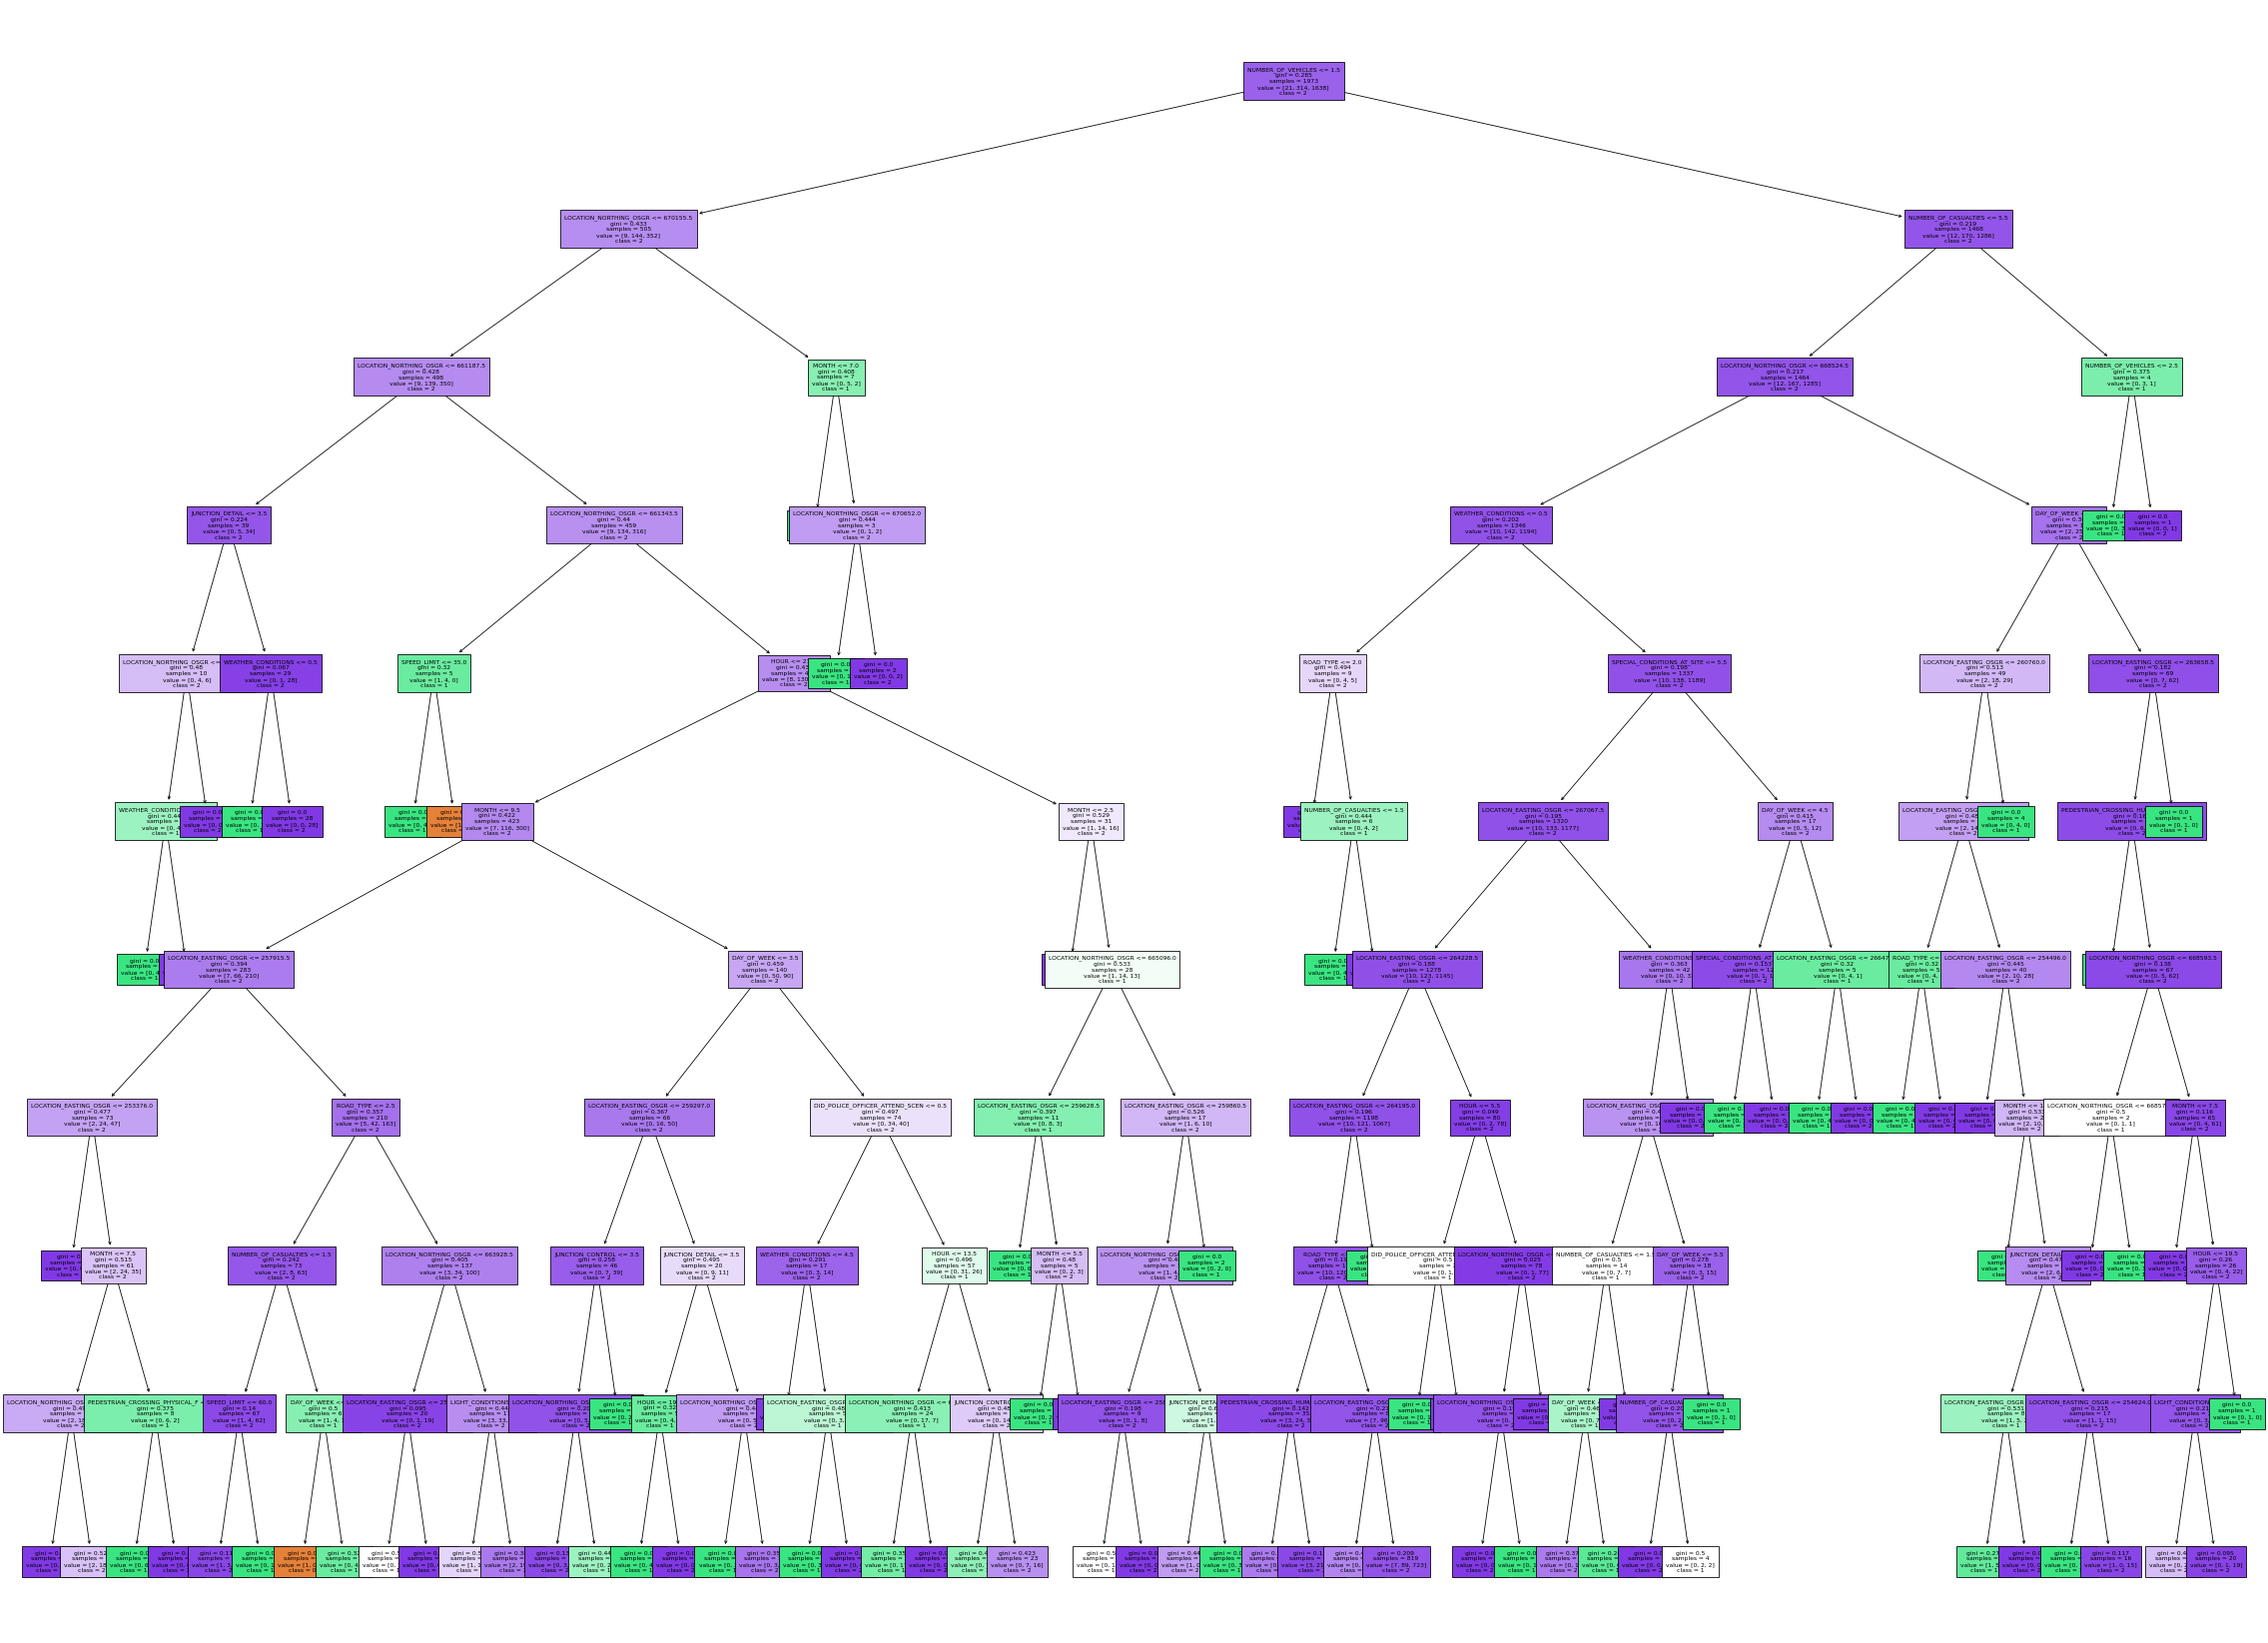

LOCATION_EASTING_OSGR     0.192588
LOCATION_NORTHING_OSGR    0.159703
NUMBER_OF_VEHICLES        0.122086
DAY_OF_WEEK               0.082373
NUMBER_OF_CASUALTIES      0.073286
dtype: float64


In [482]:



n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1500, num = 10)]
       # Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
       'max_features': max_features,
       'max_depth': max_depth,
       'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf,
       'bootstrap': bootstrap}


data=rsa_data.copy()

data.drop(['TIME'], axis=1, inplace=True)



y=data['ACCIDENT_SEVERITY']
x=data.drop(['ACCIDENT_SEVERITY',  'ACCIDENT_INDEX', 'POLICE_FORCE', 'DATE_', 'LOCAL_AUTHORITY__DISTRICT_', 'LOCAL_AUTHORITY__HIGHWAY_', 'F_1ST_ROAD_CLASS', 
       'F_2ND_ROAD_CLASS', 'OBJECTID', 'LATITUDE', 'LONGITUDE', 'F_1ST_ROAD_NUMBER', 'F_2ND_ROAD_NUMBER', 'X', 'Y', 'YEAR'], axis=1)

cat_features = ['DAY_OF_WEEK', 
       'ROAD_TYPE', 'JUNCTION_DETAIL', 'JUNCTION_CONTROL',
       'PEDESTRIAN_CROSSING_HUMAN_CONT', 'PEDESTRIAN_CROSSING_PHYSICAL_F',
       'LIGHT_CONDITIONS', 'WEATHER_CONDITIONS', 'ROAD_SURFACE_CONDITIONS',
       'SPECIAL_CONDITIONS_AT_SITE', 'CARRIAGEWAY_HAZARDS',
       'URBAN_OR_RURAL_AREA', 'DID_POLICE_OFFICER_ATTEND_SCEN']



##label encoder 

le=LabelEncoder()

for i in cat_features:
       x[i]=le.fit_transform(x[i])


#num_features = ['NUMBER_OF_VEHICLES', 'NUMBER_OF_CASUALTIES', 'HOUR', 'MONTH', 'YEAR']



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.44, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)


#model rf

rf = RF(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=400)


trees = tree.DecisionTreeClassifier(max_depth=10, random_state=42)
trees.fit(X_train_fs, y_train)
y_predt = trees.predict(X_test)


print("TREES Accuracy:", accuracy_score(y_test, y_predt))
print(" TREES Precision:", precision_score(y_test, y_predt, average='weighted'))
print("TREES F1 score:", f1_score(y_test, y_predt, average='weighted'))
print("TREES Recall:", recall_score(y_test, y_predt, average='weighted'))

print('Tree confusion matrix: \n', confusion_matrix(y_test, y_predt))

## save the model

joblib.dump(trees, path+'dtmodel.joblib')

##label encoder reverse transform nack to category x

fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(trees,
                         feature_names=x.columns,
                             class_names=['0', '1', '2'],
                                   filled=True, fontsize=6)
fig.savefig(path+'tree.png', dpi=800)

plt.show()


importances = trees.feature_importances_
feature_imp = pd.Series(importances, index=x.columns).sort_values(ascending = False)
print(feature_imp[0:5])
#std = np.std([trees.feature_importances_ for tree in rf.estimators_], axis=0)
#forest_importances = pd.Series(importances, index=xo)
fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
feature_imp.plot.bar(ax=ax)

plt.show()





### Part 3: Problem Solving


The data suggests that location of crash, # vehicles, # casualties, day of the week, and month of the year are all more important than weather conditions when predicting severity of accident. 
Special conditions at site is also an important variable to consider when analysing accident severity, but it is by no means the most important. 

*See feature importance chart above*

In light of this information, my suggestions consist of geospatial analysis of crash sites to identify the locations of high severity crashes from coordinates, improved winter and night driving infrastructure inc. grit, cats eyes etc., and a demonstrable effort to curb reckless driving across the weekend with policing, speed cameras and CCTV. 